# Part 1: Machine Learning Models

- You work for an office transport company. 
- You are in discussions with ABC Consulting company for providing transport for their employees.
- For this purpose, you are tasked with understanding how do the employees of ABC Consulting prefer to commute presently (between home and office).
- Based on the parameters like age, salary, work experience etc. given in the data set ‘cars.csv’, you are required to 
predict the preferred mode of transport.
- The project requires you to build several Machine Learning models and compare them so that the model can be finalised.


## Data Dictionary
- Age : Age of the Employee in Years
- Gender : Gender of the Employee
- Engineer : For Engineer =1 , Non Engineer =0
- MBA : For MBA =1 , Non MBA =0
- Work Exp : Experience in years
- Salary : Salary in Lakhs per Annum
- Distance : Distance in Kms from Home to Office
- license : If Employee has Driving Licence 1, If not, then 0
- Transport : Mode of Transport

- The objective is to build various Machine Learning models on this data set and based on the accuracy 
metrics decide which model is to be finalised for finally predicting the mode of transport chosen by the 
employee.


## Upload Required Libraries

In [1]:
# Pandas and Numpy libraries
import pandas as pd
import numpy as np
# For preprocessing the data
from sklearn import preprocessing
# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings 
warnings.filterwarnings( "ignore")

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV



## Importing data

In [2]:
df = pd.read_csv("C:/Users/Atul Solanki/Desktop/ML PROJECT/cars.csv")

# Basic data summary, Univariate, Bivariate analysis, graphs, checking correlations, outliers and missing values treatment (if necessary) and check the basic descriptive statistics of the dataset.

In [3]:
df.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,Male,0,0,4,14.3,3.2,0,Public Transport
1,23,Female,1,0,4,8.3,3.3,0,Public Transport
2,29,Male,1,0,7,13.4,4.1,0,Public Transport
3,28,Female,1,1,5,13.4,4.5,0,Public Transport
4,27,Male,1,0,4,13.4,4.6,0,Public Transport


In [4]:
df.shape

(444, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        444 non-null    int64  
 1   Gender     444 non-null    object 
 2   Engineer   444 non-null    int64  
 3   MBA        444 non-null    int64  
 4   Work Exp   444 non-null    int64  
 5   Salary     444 non-null    float64
 6   Distance   444 non-null    float64
 7   license    444 non-null    int64  
 8   Transport  444 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 31.3+ KB


In [6]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,444.0,NaN,NaN,NaN,27.747748,4.41671,18.0,25.0,27.0,30.0,43.0
Gender,444,2,Male,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engineer,444.0,NaN,NaN,NaN,0.754505,0.430866,0.0,1.0,1.0,1.0,1.0
MBA,444.0,NaN,NaN,NaN,0.252252,0.434795,0.0,0.0,0.0,1.0,1.0
Work Exp,444.0,NaN,NaN,NaN,6.29955,5.112098,0.0,3.0,5.0,8.0,24.0
Salary,444.0,NaN,NaN,NaN,16.238739,10.453851,6.5,9.8,13.6,15.725,57.0
Distance,444.0,NaN,NaN,NaN,11.323198,3.606149,3.2,8.8,11.0,13.425,23.4
license,444.0,NaN,NaN,NaN,0.234234,0.423997,0.0,0.0,0.0,0.0,1.0
Transport,444,2,Public Transport,300,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df["Engineer"] = pd.Categorical(df.Engineer)
df["MBA"]      = pd.Categorical(df.MBA)
df["license"]  = pd.Categorical(df.license)
df["Gender"]   = pd.Categorical(df.Gender)
df["Transport"]= pd.Categorical(df.Transport)

In [8]:
#Outliers
df_num = df.select_dtypes(exclude=['object','category']).reset_index()
df_num = df_num.drop(["index"],axis=1)
df_cat = df.select_dtypes(include=['object','category']).reset_index()
df_cat = df_cat.drop("index",axis=1)

In [9]:
df_num.head()

,Age,Work Exp,Salary,Distance
0,28,4,14.3,3.2
1,23,4,8.3,3.3
2,29,7,13.4,4.1
3,28,5,13.4,4.5
4,27,4,13.4,4.6


In [10]:
df_cat.head()

,Gender,Engineer,MBA,license,Transport
0,Male,0,0,0,Public Transport
1,Female,1,0,0,Public Transport
2,Male,1,0,0,Public Transport
3,Female,1,1,0,Public Transport
4,Male,1,0,0,Public Transport


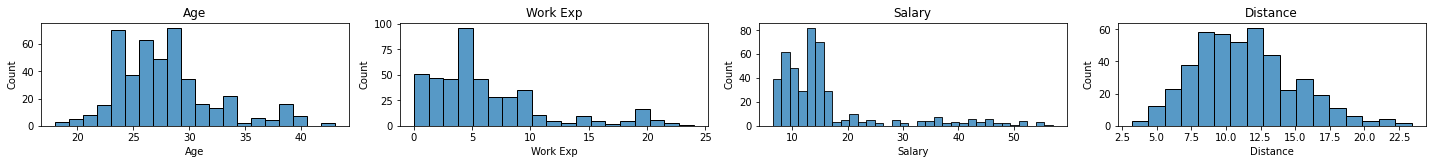

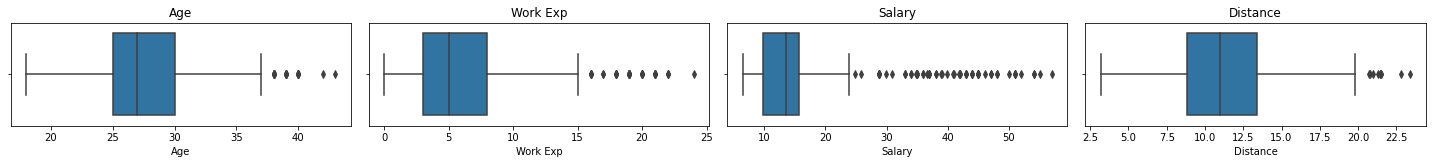

In [11]:
######################################################################################################
plt.figure(figsize = (20,10))
feature_list_num = df_num.columns
for i in range(len(feature_list_num)):
    plt.subplot(5 ,len(df_num.columns), i + 1)
    sns.histplot(x=df_num[feature_list_num[i]])
    plt.title(format(feature_list_num[i]))
    plt.tight_layout()
plt.figure(figsize = (20,10))
feature_list_num = df_num.columns
for i in range(len(feature_list_num)):
    plt.subplot(5 ,len(df_num.columns), i + 1)
    sns.boxplot(x=df_num[feature_list_num[i]])
    plt.title(format(feature_list_num[i]))
    plt.tight_layout()    
######################################################################################################

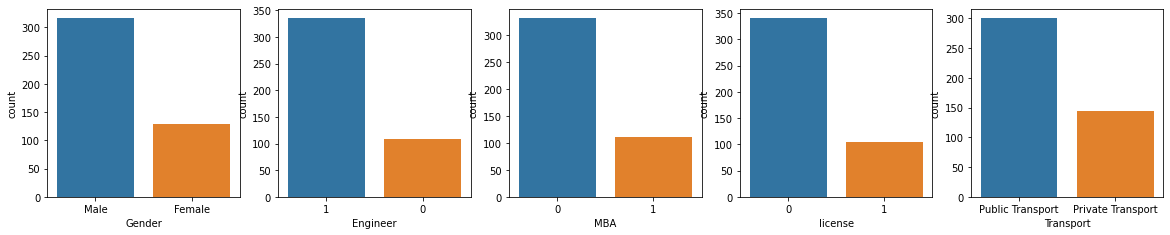

In [12]:

plt.figure(figsize = (20,20))
feature_list_cat = df_cat.columns
for i in range(len(feature_list_cat)):
    plt.subplot(len(feature_list_cat) ,5, i + 1)
    sns.countplot(x=df_cat[feature_list_cat[i]],order = df_cat[feature_list_cat[i]].value_counts().index)
    #plt.tight_layout();

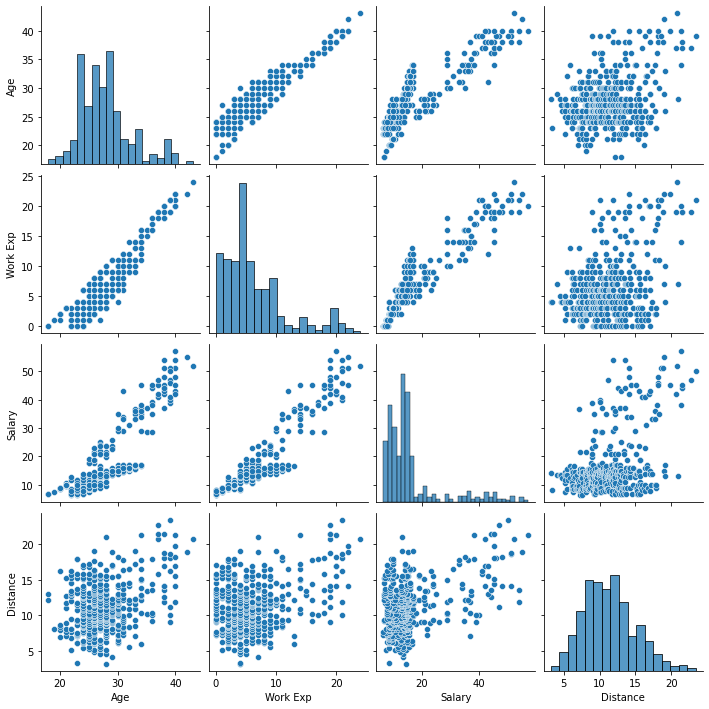

In [13]:
sns.pairplot(df_num);

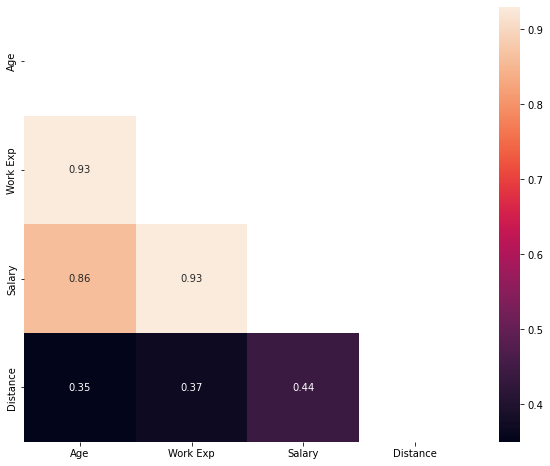

In [14]:
corr=df_num.corr()
round(corr,2)
plt.subplots(figsize = (10,8))
mask=np.triu(np.ones_like(corr,dtype=np.bool_))
sns.heatmap(round(corr,2),annot=True,mask=mask);

In [15]:
for column in df_cat.columns:
        print(column.upper(),': ',df_cat[column].nunique())
        print(df_cat[column].value_counts().sort_values())
        print('\n')

GENDER :  2
Female    128
Male      316
Name: Gender, dtype: int64


ENGINEER :  2
0    109
1    335
Name: Engineer, dtype: int64


MBA :  2
1    112
0    332
Name: MBA, dtype: int64


LICENSE :  2
1    104
0    340
Name: license, dtype: int64


TRANSPORT :  2
Private Transport    144
Public Transport     300
Name: Transport, dtype: int64




In [16]:
df = pd.read_csv("C:/Users/Atul Solanki/Desktop/ML PROJECT/cars.csv")

In [17]:
#male=0,female=1
#Public Transport=0, Private Transport=1
df.replace("Male", 0 , inplace =True)
df.replace("Female", 1 , inplace =True)
df.replace("Public Transport", 0 , inplace =True)
df.replace("Private Transport", 1 , inplace =True)

In [18]:
df.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,0,0,0,4,14.3,3.2,0,0
1,23,1,1,0,4,8.3,3.3,0,0
2,29,0,1,0,7,13.4,4.1,0,0
3,28,1,1,1,5,13.4,4.5,0,0
4,27,0,1,0,4,13.4,4.6,0,0


# Split the data into train and test in the ratio 70:30. Is scaling necessary or not?

In [19]:
from sklearn.model_selection import train_test_split

x = df.drop("Transport",axis=1)     # Predictor feature columns (8 X m)
y = df["Transport"]   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

x_train.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license
201,29,0,0,0,5,15.9,10.5,0
386,27,0,1,1,6,12.9,15.6,0
329,27,0,1,0,6,12.9,13.3,0
249,23,0,1,0,0,6.9,11.7,0
349,30,0,1,0,7,14.9,14.0,0


In [20]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(df.index)) * 100))

69.82% data is in training set
30.18% data is in test set


In [21]:
print("Original Private Transport    : {0} ({1:0.2f}%)".format(len(df.loc[df['Transport'] == 1]), (len(df.loc[df['Transport'] == 1])/len(df.index)) * 100))
print("Original Public Transport   : {0} ({1:0.2f}%)".format(len(df.loc[df['Transport'] == 0]), (len(df.loc[df['Transport'] == 0])/len(df.index)) * 100))
print("")
print("Training Private Transport    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Public Transport   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Private Transport        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Public Transport       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Private Transport    : 144 (32.43%)
Original Public Transport   : 300 (67.57%)

Training Private Transport    : 102 (32.90%)
Training Public Transport   : 208 (67.10%)

Test Private Transport        : 42 (31.34%)
Test Public Transport       : 92 (68.66%)



# Build the following models on the 70% training data and check the performance of these models on the Training as well as the 30% Test data using the various inferences from the Confusion Matrix and plotting a AUC-ROC curve along with the AUC values. Tune the models wherever required for optimum performance.
-  Logistic Regression
-  Naïve Bayes
-  k-Nearest Neighbour
-  Linear Discriminant Analysis	
-  Classification And Regression Tree
-  Regularised CART
-  Random Forest
-  Random Forest_tune	
g. Boosting Classifier Model using Gradient boost. 

# Logistic Regression

### Building and Training the Model

In [22]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)

coef_df = pd.DataFrame(model.coef_,columns=x.columns)
coef_df['intercept'] = model.intercept_
coef_df

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,intercept
0,-0.231103,1.106932,0.289891,-0.350651,0.125584,0.069515,0.225455,1.862196,0.202497


### Making Predictions From Our Model

In [23]:
#predict on test
prediction_train= model.predict(x_train)
prediction_test = model.predict(x_test)

### Testing the Performance of our Model

In [24]:
from sklearn import metrics

In [25]:
Acc_Train_LR = model.score(x_train,y_train)
Acc_Test_LR  = model.score(x_test ,y_test )

In [26]:
#Mean Absolute Error (MAE)
MAE_LR = metrics.mean_absolute_error(y_test, prediction_test)

In [27]:
#Mean Squared Error (MSE)
MSE_LR = metrics.mean_squared_error(y_test, prediction_test)

In [28]:
#Root Mean Squared Error (RMSE)
RMSE_LR = np.sqrt(metrics.mean_squared_error(y_test, prediction_test))

### Model Evaluation

AUC: 0.832


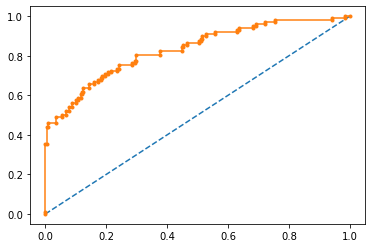

In [29]:
# predict probabilities
probs = model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_train = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc_train)
AUC_train_LR = auc_train
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.818


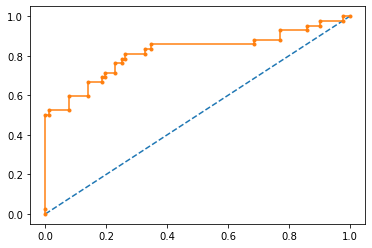

In [30]:
# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_test = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc_test)
AUC_test_LR = auc_test
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Measuring the Performance of a Machine Learning Model

In [31]:
from sklearn.metrics import classification_report
print("Classification Report Train Data")
print(classification_report(y_train, prediction_train))

print("Classification Report Test Data")
print(classification_report(y_test, prediction_test))

Classification Report Train Data
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       208
           1       0.77      0.52      0.62       102

    accuracy                           0.79       310
   macro avg       0.78      0.72      0.74       310
weighted avg       0.79      0.79      0.78       310

Classification Report Test Data
              precision    recall  f1-score   support

           0       0.83      0.92      0.88        92
           1       0.78      0.60      0.68        42

    accuracy                           0.82       134
   macro avg       0.81      0.76      0.78       134
weighted avg       0.82      0.82      0.81       134



          Confusion matrix on the train data


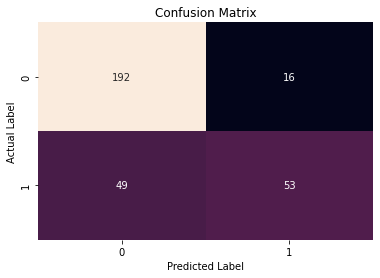

          Confusion matrix on the test data


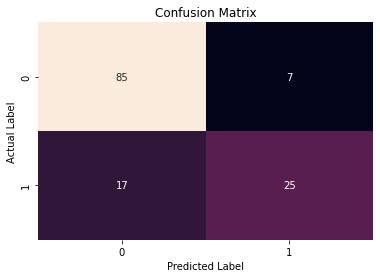

In [32]:
# Get the confusion matrix on the train data
print("          Confusion matrix on the train data")
confusion_matrix(y_train,prediction_train)
sns.heatmap(confusion_matrix(y_train,prediction_train),annot=True, fmt='d',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()
# Get the confusion matrix on the test data
print("          Confusion matrix on the test data")
confusion_matrix(y_test,prediction_test)
sns.heatmap(confusion_matrix(y_test,prediction_test),annot=True, fmt='d',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [33]:
#Public Transport=0, Private Transport=1

In [34]:
c_mat = confusion_matrix(y_train,prediction_train)
TP_LR = c_mat[1,1]   #TP
TN_LR = c_mat[0,0]   #TN
FP_LR = c_mat[1,0]   #FP
FN_LR = c_mat[0,1]   #FN

## - The confusion matrix on Training Data

- True Positives (TP): we correctly predicted that they use Private Transport 53

- True Negatives (TN): we correctly predicted that they use Public Transport 192

- False Positives (FP): we incorrectly predicted that they use Private Transport (a "Type I error") 49 Falsely predict positive Type I error

- False Negatives (FN): we incorrectly predicted that they use Public Transport (a "Type II error") 16 Falsely predict negative Type II error

## - The confusion matrix on Testing Data

- True Positives (TP): we correctly predicted that they use Private Transport 25

- True Negatives (TN): we correctly predicted that they use Public Transport 85

- False Positives (FP): we incorrectly predicted that they use Private Transport (a "Type I error") 17 Falsely predict positive Type I error

- False Negatives (FN): we incorrectly predicted that they use Public Transport (a "Type II error") 7 Falsely predict negative Type II error

# Naive Bayes 

### Building and Training the Model

In [35]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# create the model
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

### Making Predictions From Our Model

In [36]:
#predict on test
prediction_train= model.predict(x_train)
prediction_test = model.predict(x_test)

### Testing the Performance of our Model

In [37]:
from sklearn import metrics

In [38]:
Acc_Train_NB = model.score(x_train,y_train)
Acc_Test_NB  = model.score(x_test ,y_test )

In [39]:
#Mean Absolute Error (MAE)
MAE_NB = metrics.mean_absolute_error(y_test, prediction_test)

In [40]:
#Mean Squared Error (MSE)
MSE_NB = metrics.mean_squared_error(y_test, prediction_test)

In [41]:
#Root Mean Squared Error (RMSE)
RMSE_NB = np.sqrt(metrics.mean_squared_error(y_test, prediction_test))

### Model Evaluation

AUC: 0.798


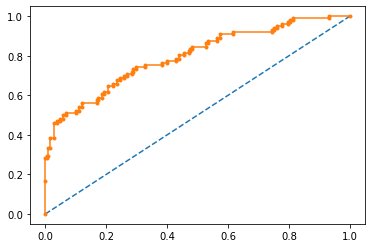

In [42]:
# predict probabilities
probs = model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_train = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc_train)
AUC_train_NB = auc_train
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.781


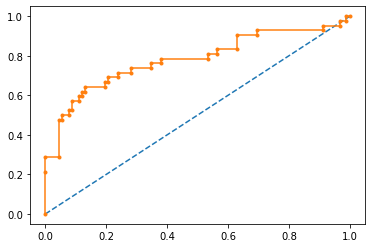

In [43]:
# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_test = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc_test)
AUC_test_NB = auc_test
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Measuring the Performance of a Machine Learning Model

In [44]:
from sklearn.metrics import classification_report
print("Classification Report Train Data")
print(classification_report(y_train, prediction_train))

print("Classification Report Test Data")
print(classification_report(y_test, prediction_test))

Classification Report Train Data
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       208
           1       0.80      0.50      0.61       102

    accuracy                           0.79       310
   macro avg       0.79      0.72      0.74       310
weighted avg       0.79      0.79      0.78       310

Classification Report Test Data
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        92
           1       0.73      0.52      0.61        42

    accuracy                           0.79       134
   macro avg       0.77      0.72      0.73       134
weighted avg       0.78      0.79      0.78       134



          Confusion matrix on the train data


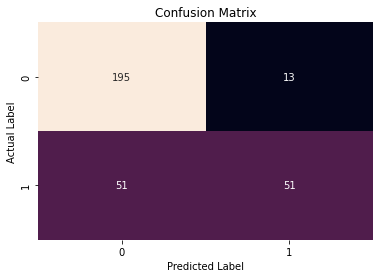

          Confusion matrix on the test data


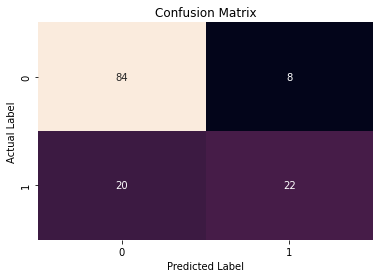

In [45]:
# Get the confusion matrix on the train data
print("          Confusion matrix on the train data")
confusion_matrix(y_train,prediction_train)
sns.heatmap(confusion_matrix(y_train,prediction_train),annot=True, fmt='d',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()
# Get the confusion matrix on the test data
print("          Confusion matrix on the test data")
confusion_matrix(y_test,prediction_test)
sns.heatmap(confusion_matrix(y_test,prediction_test),annot=True, fmt='d',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [46]:
#Public Transport=0, Private Transport=1

In [47]:
c_mat = confusion_matrix(y_train,prediction_train)
TP_NB = c_mat[1,1]   #TP
TN_NB = c_mat[0,0]   #TN
FP_NB = c_mat[1,0]   #FP
FN_NB = c_mat[0,1]   #FN

## - The confusion matrix on Training Data

- True Positives (TP): we correctly predicted that they use Private Transport 51

- True Negatives (TN): we correctly predicted that they use Public Transport 195

- False Positives (FP): we incorrectly predicted that they use Private Transport (a "Type I error") 13 Falsely predict positive Type I error

- False Negatives (FN): we incorrectly predicted that they use Public Transport (a "Type II error") 51 Falsely predict negative Type II error

## - The confusion matrix on Testing Data

- True Positives (TP): we correctly predicted that they use Private Transport 22

- True Negatives (TN): we correctly predicted that they use Public Transport 84

- False Positives (FP): we incorrectly predicted that they use Private Transport (a "Type I error") 8 Falsely predict positive Type I error

- False Negatives (FN): we incorrectly predicted that they use Public Transport (a "Type II error") 20 Falsely predict negative Type II error

# kNN Model

In [48]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.

xScaled  = x.apply(zscore)  # convert all attributes to Z scale 

xScaled.describe()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license
count,4.440000e+02,4.440000e+02,4.440000e+02,4.440000e+02,4.440000e+02,4.440000e+02,4.440000e+02,4.440000e+02
mean,1.470295e-16,2.385479e-16,1.797861e-16,-4.400884e-17,-1.030207e-16,3.440691e-16,-7.621531e-16,-1.500301e-17
std,1.001128e+00,1.001128e+00,1.001128e+00,1.001128e+00,1.001128e+00,1.001128e+00,1.001128e+00,1.001128e+00
min,-2.209505e+00,-6.364458e-01,-1.753110e+00,-5.808179e-01,-1.233673e+00,-9.326442e-01,-2.255137e+00,-5.530663e-01
25%,-6.228272e-01,-6.364458e-01,5.704149e-01,-5.808179e-01,-6.461675e-01,-6.166150e-01,-7.004825e-01,-5.530663e-01
50%,-1.694907e-01,-6.364458e-01,5.704149e-01,-5.808179e-01,-2.544974e-01,-2.527026e-01,-8.972528e-02,-5.530663e-01
75%,5.105141e-01,1.571226e+00,5.704149e-01,1.721710e+00,3.330078e-01,-4.919892e-02,5.834957e-01,-5.530663e-01
max,3.457201e+00,1.571226e+00,5.704149e-01,1.721710e+00,3.466369e+00,3.903560e+00,3.352724e+00,1.808101e+00


In [49]:
# Split X and y into training and test set in 75:25 ratio

x_train, x_test, y_train, y_test = train_test_split(xScaled, y, test_size=0.30, random_state=1)

### Building and Training the Model

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
model = KNeighborsClassifier(n_neighbors= 5,weights = 'distance' )
# Call Nearest Neighbour algorithm
model.fit(x_train, y_train)

KNeighborsClassifier(weights='distance')

### Making Predictions From Our Model

In [51]:
#predict on test
prediction_train= model.predict(x_train)
prediction_test = model.predict(x_test)

### Testing the Performance of our Model

In [52]:
from sklearn import metrics

In [53]:
Acc_Train_kNN = model.score(x_train,y_train)
Acc_Test_kNN = model.score(x_test ,y_test )

In [54]:
#Mean Absolute Error (MAE)
MAE_kNN = metrics.mean_absolute_error(y_test, prediction_test)

In [55]:
#Mean Squared Error (MSE)
MSE_kNN = metrics.mean_squared_error(y_test, prediction_test)

In [56]:
#Root Mean Squared Error (RMSE)
RMSE_kNN = np.sqrt(metrics.mean_squared_error(y_test, prediction_test))

### Model Evaluation

AUC: 1.000


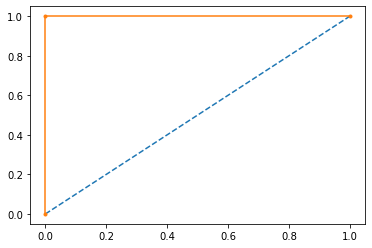

In [57]:
# predict probabilities
probs = model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_train = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc_train)
AUC_train_kNN = auc_train
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.760


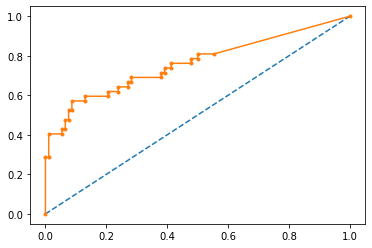

In [58]:
# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_test = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc_test)
AUC_test_kNN = auc_test
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Measuring the Performance of a Machine Learning Model

In [59]:
from sklearn.metrics import classification_report
print("Classification Report Train Data")
print(classification_report(y_train, prediction_train))

print("Classification Report Test Data")
print(classification_report(y_test, prediction_test))

Classification Report Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       208
           1       1.00      1.00      1.00       102

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310

Classification Report Test Data
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        92
           1       0.69      0.57      0.62        42

    accuracy                           0.78       134
   macro avg       0.75      0.73      0.74       134
weighted avg       0.78      0.78      0.78       134



          Confusion matrix on the train data


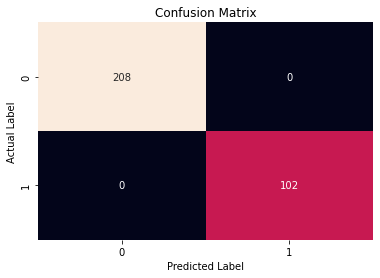

          Confusion matrix on the test data


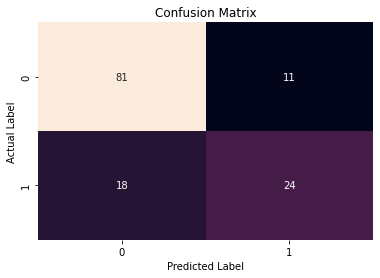

In [60]:
# Get the confusion matrix on the train data
print("          Confusion matrix on the train data")
confusion_matrix(y_train,prediction_train)
sns.heatmap(confusion_matrix(y_train,prediction_train),annot=True, fmt='d',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()
# Get the confusion matrix on the test data
print("          Confusion matrix on the test data")
confusion_matrix(y_test,prediction_test)
sns.heatmap(confusion_matrix(y_test,prediction_test),annot=True, fmt='d',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [61]:
#Public Transport=0, Private Transport=1

In [62]:
c_mat = confusion_matrix(y_train,prediction_train)
TP_kNN = c_mat[1,1]   #TP
TN_kNN = c_mat[0,0]   #TN
FP_kNN = c_mat[1,0]   #FP
FN_kNN = c_mat[0,1]   #FN

## - The confusion matrix on Training Data

- True Positives (TP): we correctly predicted that they use Private Transport 102

- True Negatives (TN): we correctly predicted that they use Public Transport 208

- False Positives (FP): we incorrectly predicted that they use Private Transport (a "Type I error") 0 Falsely predict positive Type I error

- False Negatives (FN): we incorrectly predicted that they use Public Transport (a "Type II error") 0 Falsely predict negative Type II error

## - The confusion matrix on Testing Data

- True Positives (TP): we correctly predicted that they use Private Transport 24

- True Negatives (TN): we correctly predicted that they use Public Transport 81

- False Positives (FP): we incorrectly predicted that they use Private Transport (a "Type I error") 11 Falsely predict positive Type I error

- False Negatives (FN): we incorrectly predicted that they use Public Transport (a "Type II error") 18 Falsely predict negative Type II error

# Linear Discriminant Analysis

In [63]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale

In [64]:
# Build LDA Model
# Refer details for LDA at http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html
clf = LinearDiscriminantAnalysis()
model=clf.fit(x_train,y_train)
model

LinearDiscriminantAnalysis()

### Making Predictions From Our Model

In [65]:
#predict on test
prediction_train= model.predict(x_train)
prediction_test = model.predict(x_test)

### Testing the Performance of our Model

In [66]:
from sklearn import metrics

In [67]:
Acc_Train_LDA = model.score(x_train,y_train)
Acc_Test_LDA  = model.score(x_test ,y_test )

In [68]:
#Mean Absolute Error (MAE)
MAE_LDA = metrics.mean_absolute_error(y_test, prediction_test)

In [69]:
#Mean Squared Error (MSE)
MSE_LDA = metrics.mean_squared_error(y_test, prediction_test)

In [70]:
#Root Mean Squared Error (RMSE)
RMSE_LDA = np.sqrt(metrics.mean_squared_error(y_test, prediction_test))

### Model Evaluation

AUC: 0.834


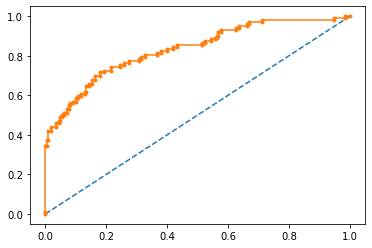

In [71]:
# predict probabilities
probs = model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_train = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc_train)
AUC_train_LDA = auc_train
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.810


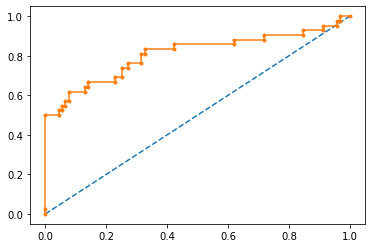

In [72]:
# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_test = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc_test)
AUC_test_LDA = auc_test
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Measuring the Performance of a Machine Learning Model

In [73]:
from sklearn.metrics import classification_report
print("Classification Report Train Data")
print(classification_report(y_train, prediction_train))

print("Classification Report Test Data")
print(classification_report(y_test, prediction_test))

Classification Report Train Data
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       208
           1       0.77      0.56      0.65       102

    accuracy                           0.80       310
   macro avg       0.79      0.74      0.75       310
weighted avg       0.80      0.80      0.79       310

Classification Report Test Data
              precision    recall  f1-score   support

           0       0.84      0.91      0.87        92
           1       0.76      0.62      0.68        42

    accuracy                           0.82       134
   macro avg       0.80      0.77      0.78       134
weighted avg       0.82      0.82      0.82       134



          Confusion matrix on the train data


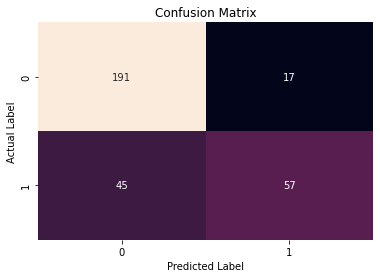

          Confusion matrix on the test data


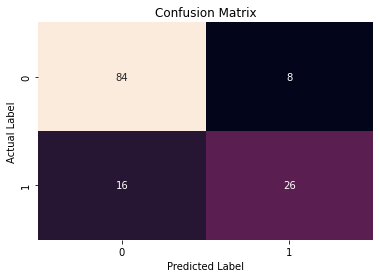

In [74]:
# Get the confusion matrix on the train data
print("          Confusion matrix on the train data")
confusion_matrix(y_train,prediction_train)
sns.heatmap(confusion_matrix(y_train,prediction_train),annot=True, fmt='d',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()
# Get the confusion matrix on the test data
print("          Confusion matrix on the test data")
confusion_matrix(y_test,prediction_test)
sns.heatmap(confusion_matrix(y_test,prediction_test),annot=True, fmt='d',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [75]:
#Public Transport=0, Private Transport=1

In [76]:
c_mat = confusion_matrix(y_train,prediction_train)
TP_LDA = c_mat[1,1]   #TP
TN_LDA = c_mat[0,0]   #TN
FP_LDA = c_mat[1,0]   #FP
FN_LDA = c_mat[0,1]   #FN

## - The confusion matrix on Training Data

- True Positives (TP): we correctly predicted that they use Private Transport 57

- True Negatives (TN): we correctly predicted that they use Public Transport 191

- False Positives (FP): we incorrectly predicted that they use Private Transport (a "Type I error") 17 Falsely predict positive Type I error

- False Negatives (FN): we incorrectly predicted that they use Public Transport (a "Type II error") 45 Falsely predict negative Type II error

## - The confusion matrix on Testing Data

- True Positives (TP): we correctly predicted that they use Private Transport 26

- True Negatives (TN): we correctly predicted that they use Public Transport 84

- False Positives (FP): we incorrectly predicted that they use Private Transport (a "Type I error") 8 Falsely predict positive Type I error

- False Negatives (FN): we incorrectly predicted that they use Public Transport (a "Type II error") 16 Falsely predict negative Type II error

# CART

In [77]:
df = pd.read_csv("C:/Users/Atul Solanki/Desktop/ML PROJECT/cars.csv")

In [78]:
#male=0,female=1
#Public Transport=0, Private Transport=1
df.replace("Male", 0 , inplace =True)
df.replace("Female", 1 , inplace =True)
df.replace("Public Transport", 0 , inplace =True)
df.replace("Private Transport", 1 , inplace =True)

In [79]:
df.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,0,0,0,4,14.3,3.2,0,0
1,23,1,1,0,4,8.3,3.3,0,0
2,29,0,1,0,7,13.4,4.1,0,0
3,28,1,1,1,5,13.4,4.5,0,0
4,27,0,1,0,4,13.4,4.6,0,0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        444 non-null    int64  
 1   Gender     444 non-null    int64  
 2   Engineer   444 non-null    int64  
 3   MBA        444 non-null    int64  
 4   Work Exp   444 non-null    int64  
 5   Salary     444 non-null    float64
 6   Distance   444 non-null    float64
 7   license    444 non-null    int64  
 8   Transport  444 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 KB


In [81]:
x = df.copy().drop("Transport", axis=1)

y = df.copy().pop("Transport")


In [82]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=1)

In [83]:
## Scaling the variables
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
#Initialize an object for MinMaxScalerScaler
sc = MinMaxScaler()
#Scale the training data
x_train.iloc[:,:2] = sc.fit_transform(x_train.iloc[:,:2])
# Apply the transformation on the test data
x_test.iloc[:,:2] = sc.transform(x_test.iloc[:,:2])

In [84]:
# Initialise a Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion = 'gini', random_state=1)
# Fit the model
model = dt_model.fit(x_train, y_train)

In [85]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(x_train), 
                                class_names = list(train_char_label))

ld_Tree_File.close()


The above code will save a .dot file in your working directory.  
WebGraphviz is Graphviz in the Browser.   
Copy paste the contents of the file into the link below to get the visualization     
http://webgraphviz.com/

In [86]:
pd.DataFrame(model.feature_importances_, columns = ["Percentage Importance"], index = x_train.columns).sort_values('Percentage Importance',ascending=False)*100

,Percentage Importance
Salary,37.309907
Distance,16.873298
Age,13.303665
Work Exp,12.772382
license,10.631826
Gender,4.369135
Engineer,2.444546
MBA,2.295241


### Making Predictions From Our Model

In [87]:
#predict on test
prediction_train= model.predict(x_train)
prediction_test = model.predict(x_test)

### Testing the Performance of our Model

In [88]:
from sklearn import metrics

In [89]:
Acc_Train_CART = model.score(x_train,y_train)
Acc_Test_CART  = model.score(x_test ,y_test )

In [90]:
#Mean Absolute Error (MAE)
MAE_CART = metrics.mean_absolute_error(y_test, prediction_test)

In [91]:
#Mean Squared Error (MSE)
MSE_CART = metrics.mean_squared_error(y_test, prediction_test)

In [92]:
#Root Mean Squared Error (RMSE)
RMSE_CART = np.sqrt(metrics.mean_squared_error(y_test, prediction_test))

### Model Evaluation

AUC: 1.000


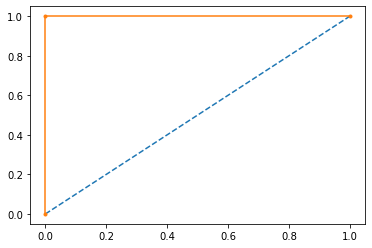

In [93]:
# predict probabilities
probs = model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_train = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc_train)
AUC_train_CART = auc_train
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.781


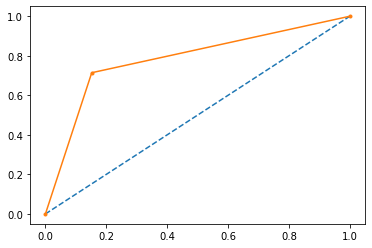

In [94]:
# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_test = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc_test)
AUC_test_CART = auc_test
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Measuring the Performance of a Machine Learning Model

In [95]:
from sklearn.metrics import classification_report
print("Classification Report Train Data")
print(classification_report(y_train, prediction_train))

print("Classification Report Test Data")
print(classification_report(y_test, prediction_test))

Classification Report Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       208
           1       1.00      1.00      1.00       102

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310

Classification Report Test Data
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        92
           1       0.68      0.71      0.70        42

    accuracy                           0.81       134
   macro avg       0.77      0.78      0.78       134
weighted avg       0.81      0.81      0.81       134



          Confusion matrix on the train data


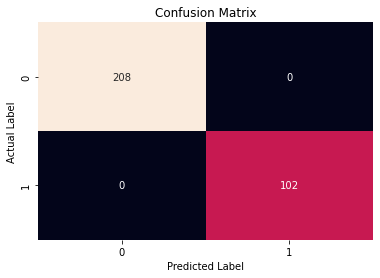

          Confusion matrix on the test data


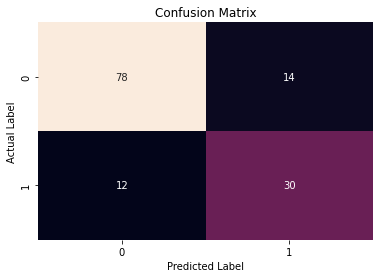

In [96]:
# Get the confusion matrix on the train data
print("          Confusion matrix on the train data")
confusion_matrix(y_train,prediction_train)
sns.heatmap(confusion_matrix(y_train,prediction_train),annot=True, fmt='d',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()
# Get the confusion matrix on the test data
print("          Confusion matrix on the test data")
confusion_matrix(y_test,prediction_test)
sns.heatmap(confusion_matrix(y_test,prediction_test),annot=True, fmt='d',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [97]:
#Public Transport=0, Private Transport=1

In [98]:
c_mat = confusion_matrix(y_train,prediction_train)
TP_CART = c_mat[1,1]   #TP
TN_CART = c_mat[0,0]   #TN
FP_CART = c_mat[1,0]   #FP
FN_CART = c_mat[0,1]   #FN

## - The confusion matrix on Training Data

- True Positives (TP): we correctly predicted that they use Private Transport 102

- True Negatives (TN): we correctly predicted that they use Public Transport 208

- False Positives (FP): we incorrectly predicted that they use Private Transport (a "Type I error") 0 Falsely predict positive Type I error

- False Negatives (FN): we incorrectly predicted that they use Public Transport (a "Type II error") 0 Falsely predict negative Type II error

## - The confusion matrix on Testing Data

- True Positives (TP): we correctly predicted that they use Private Transport 30

- True Negatives (TN): we correctly predicted that they use Public Transport 78

- False Positives (FP): we incorrectly predicted that they use Private Transport (a "Type I error") 14 Falsely predict positive Type I error

- False Negatives (FN): we incorrectly predicted that they use Public Transport (a "Type II error") 12 Falsely predict negative Type II error

## Regularising the Decision Tree

### Adding Tuning Parameters

In [99]:
param_grid = {
    'criterion': ["gini"],
    'max_depth': [3,4,5,6,7,10,15,25],
    'max_features': [2,3,4,5],
    'min_samples_split': [2,4,40,50,60,70]
}

reg_dt_model = DecisionTreeClassifier(random_state=1)


grid_search = GridSearchCV(estimator = reg_dt_model, param_grid = param_grid, cv = 15)

In [100]:
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'criterion': 'gini', 'max_depth': 7, 'max_features': 2, 'min_samples_split': 4}


DecisionTreeClassifier(max_depth=7, max_features=2, min_samples_split=4,
                       random_state=1)

In [101]:
################Change best parameters in the next cell

In [102]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 7,max_features=2,min_samples_split=4,random_state=1)
model = reg_dt_model.fit(x_train, y_train)

In [103]:
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(model, out_file= tree_regularized , feature_names = list(x_train), class_names = list(train_char_label))

tree_regularized.close()
dot_data

train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(x_train), 
                                class_names = list(train_char_label))

ld_Tree_File.close()


In [104]:
pd.DataFrame(model.feature_importances_, columns = ["Percentage Importance"], index = x_train.columns).sort_values('Percentage Importance',ascending=False)*100

,Percentage Importance
license,26.333445
Work Exp,22.865689
Distance,19.003978
Age,11.310787
Salary,11.124701
Gender,5.116662
Engineer,4.238832
MBA,0.005905


### Making Predictions From Our Model

In [105]:
#predict on test
prediction_train= model.predict(x_train)
prediction_test = model.predict(x_test)

### Testing the Performance of our Model

In [106]:
from sklearn import metrics

In [107]:
Acc_Train_CART_reg = model.score(x_train,y_train)
Acc_Test_CART_reg  = model.score(x_test ,y_test )

In [108]:
#Mean Absolute Error (MAE)
MAE_CART_reg = metrics.mean_absolute_error(y_test, prediction_test)

In [109]:
#Mean Squared Error (MSE)
MSE_CART_reg = metrics.mean_squared_error(y_test, prediction_test)

In [110]:
#Root Mean Squared Error (RMSE)
RMSE_CART_reg = np.sqrt(metrics.mean_squared_error(y_test, prediction_test))

### Model Evaluation

AUC: 0.966


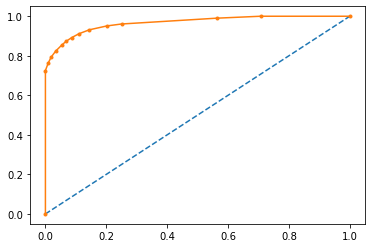

In [111]:
# predict probabilities
probs = model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_train = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc_train)
AUC_train_CART_reg = auc_train
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.683


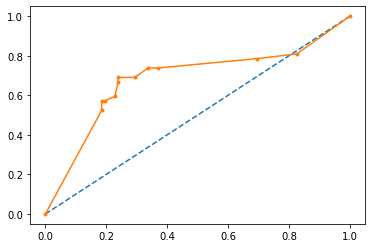

In [112]:
# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_test = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc_test)
AUC_test_CART_reg = auc_test
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Measuring the Performance of a Machine Learning Model

In [113]:
from sklearn.metrics import classification_report
print("Classification Report Train Data")
print(classification_report(y_train, prediction_train))

print("Classification Report Test Data")
print(classification_report(y_test, prediction_test))

Classification Report Train Data
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       208
           1       0.95      0.79      0.87       102

    accuracy                           0.92       310
   macro avg       0.93      0.89      0.90       310
weighted avg       0.92      0.92      0.92       310

Classification Report Test Data
              precision    recall  f1-score   support

           0       0.81      0.82      0.81        92
           1       0.59      0.57      0.58        42

    accuracy                           0.74       134
   macro avg       0.70      0.69      0.69       134
weighted avg       0.74      0.74      0.74       134



          Confusion matrix on the train data


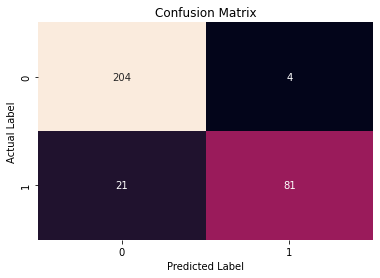

          Confusion matrix on the test data


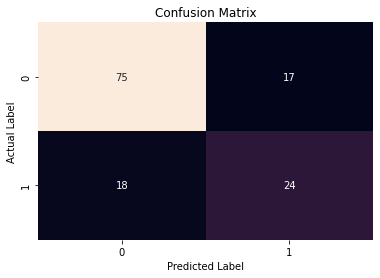

In [114]:
# Get the confusion matrix on the train data
print("          Confusion matrix on the train data")
confusion_matrix(y_train,prediction_train)
sns.heatmap(confusion_matrix(y_train,prediction_train),annot=True, fmt='d',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()
# Get the confusion matrix on the test data
print("          Confusion matrix on the test data")
confusion_matrix(y_test,prediction_test)
sns.heatmap(confusion_matrix(y_test,prediction_test),annot=True, fmt='d',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [115]:
#Public Transport=0, Private Transport=1

In [116]:
c_mat = confusion_matrix(y_train,prediction_train)
TP_CART_reg = c_mat[1,1]   #TP
TN_CART_reg = c_mat[0,0]   #TN
FP_CART_reg = c_mat[1,0]   #FP
FN_CART_reg = c_mat[0,1]   #FN

## - The confusion matrix on Training Data

- True Positives (TP): we correctly predicted that they use Private Transport 81

- True Negatives (TN): we correctly predicted that they use Public Transport 204

- False Positives (FP): we incorrectly predicted that they use Private Transport (a "Type I error") 4 Falsely predict positive Type I error

- False Negatives (FN): we incorrectly predicted that they use Public Transport (a "Type II error") 21 Falsely predict negative Type II error

## - The confusion matrix on Testing Data

- True Positives (TP): we correctly predicted that they use Private Transport 24

- True Negatives (TN): we correctly predicted that they use Public Transport 75

- False Positives (FP): we incorrectly predicted that they use Private Transport (a "Type I error") 17 Falsely predict positive Type I error

- False Negatives (FN): we incorrectly predicted that they use Public Transport (a "Type II error") 18 Falsely predict negative Type II error

# Random Forest

In [117]:
#Build a RandomForestCassifier wit n_estimators 100, max_features 6, andfit it on the training data
rfcl = RandomForestClassifier(n_estimators = 100, max_features=None, max_depth=None, min_samples_split=2,random_state=1, bootstrap=True, oob_score=True)
model = rfcl.fit(x_train, y_train)

### Making Predictions From Our Model

In [118]:
#predict on test
prediction_train= model.predict(x_train)
prediction_test = model.predict(x_test)

### Testing the Performance of our Model

In [119]:
from sklearn import metrics

In [120]:
Acc_Train_RF = model.score(x_train,y_train)
Acc_Test_RF  = model.score(x_test ,y_test )

In [121]:
#Mean Absolute Error (MAE)
MAE_RF = metrics.mean_absolute_error(y_test, prediction_test)

In [122]:
#Mean Squared Error (MSE)
MSE_RF = metrics.mean_squared_error(y_test, prediction_test)

In [123]:
#Root Mean Squared Error (RMSE)
RMSE_RF = np.sqrt(metrics.mean_squared_error(y_test, prediction_test))

### Model Evaluation

AUC: 1.000


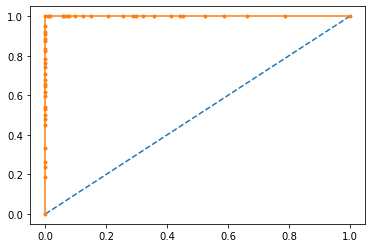

In [124]:
# predict probabilities
probs = model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_train = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc_train)
AUC_train_RF = auc_train
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.852


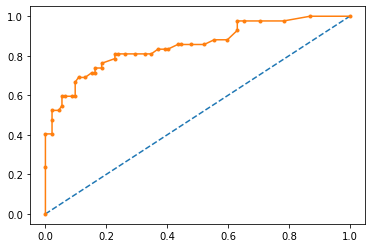

In [125]:
# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_test = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc_test)
AUC_test_RF = auc_test
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Measuring the Performance of a Machine Learning Model

In [126]:
from sklearn.metrics import classification_report
print("Classification Report Train Data")
print(classification_report(y_train, prediction_train))

print("Classification Report Test Data")
print(classification_report(y_test, prediction_test))

Classification Report Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       208
           1       1.00      1.00      1.00       102

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310

Classification Report Test Data
              precision    recall  f1-score   support

           0       0.86      0.89      0.88        92
           1       0.74      0.69      0.72        42

    accuracy                           0.83       134
   macro avg       0.80      0.79      0.80       134
weighted avg       0.83      0.83      0.83       134



          Confusion matrix on the train data


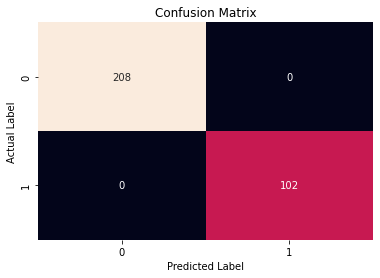

          Confusion matrix on the test data


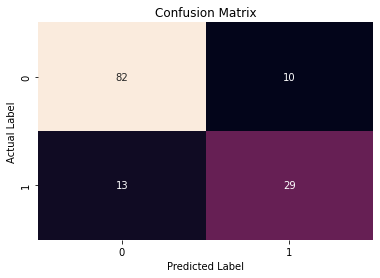

In [127]:
# Get the confusion matrix on the train data
print("          Confusion matrix on the train data")
confusion_matrix(y_train,prediction_train)
sns.heatmap(confusion_matrix(y_train,prediction_train),annot=True, fmt='d',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()
# Get the confusion matrix on the test data
print("          Confusion matrix on the test data")
confusion_matrix(y_test,prediction_test)
sns.heatmap(confusion_matrix(y_test,prediction_test),annot=True, fmt='d',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [128]:
#Public Transport=0, Private Transport=1

In [129]:
c_mat = confusion_matrix(y_train,prediction_train)
TP_RF = c_mat[1,1]   #TP
TN_RF = c_mat[0,0]   #TN
FP_RF = c_mat[1,0]   #FP
FN_RF = c_mat[0,1]   #FN

## - The confusion matrix on Training Data

- True Positives (TP): we correctly predicted that they use Private Transport 102

- True Negatives (TN): we correctly predicted that they use Public Transport 208

- False Positives (FP): we incorrectly predicted that they use Private Transport (a "Type I error") 4 Falsely predict positive Type I error

- False Negatives (FN): we incorrectly predicted that they use Public Transport (a "Type II error") 21 Falsely predict negative Type II error

## - The confusion matrix on Testing Data

- True Positives (TP): we correctly predicted that they use Private Transport 29

- True Negatives (TN): we correctly predicted that they use Public Transport 82

- False Positives (FP): we incorrectly predicted that they use Private Transport (a "Type I error") 10 Falsely predict positive Type I error

- False Negatives (FN): we incorrectly predicted that they use Public Transport (a "Type II error") 13 Falsely predict negative Type II error

In [130]:
######################################

In [131]:
param_grid = {
    'criterion': ["gini"],
    'n_estimators' : [10,20,50,100],
    'warm_start' : [True,False],
    'max_depth': [3,5,10],
    'max_features': [3,5,9],
    'min_samples_split': [5,10,15]
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'criterion': 'gini', 'max_depth': 10, 'max_features': 3, 'min_samples_split': 5, 'n_estimators': 100, 'warm_start': True}


RandomForestClassifier(max_depth=10, max_features=3, min_samples_split=5,
                       random_state=1, warm_start=True)

In [132]:
################Change best parameters in the next cell

In [133]:
#Build a RandomForestCassifier wit n_estimators 100, max_features 6, andfit it on the training data
rfcl = RandomForestClassifier(n_estimators = 500, warm_start = True, max_features=8, max_depth=5, min_samples_split=11,random_state=1, bootstrap=True, oob_score=True)
model = rfcl.fit(x_train, y_train)

### Making Predictions From Our Model

In [134]:
#predict on test
prediction_train= model.predict(x_train)
prediction_test = model.predict(x_test)

### Testing the Performance of our Model

In [135]:
from sklearn import metrics

In [136]:
Acc_Train_RF_tune = model.score(x_train,y_train)
Acc_Test_RF_tune  = model.score(x_test ,y_test )

In [137]:
#Mean Absolute Error (MAE)
MAE_RF_tune = metrics.mean_absolute_error(y_test, prediction_test)

In [138]:
#Mean Squared Error (MSE)
MSE_RF_tune = metrics.mean_squared_error(y_test, prediction_test)

In [139]:
#Root Mean Squared Error (RMSE)
RMSE_RF_tune = np.sqrt(metrics.mean_squared_error(y_test, prediction_test))

### Model Evaluation

AUC: 0.965


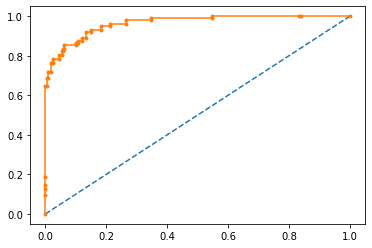

In [140]:
# predict probabilities
probs = model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_train = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc_train)
AUC_train_RF_tune = auc_train
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.834


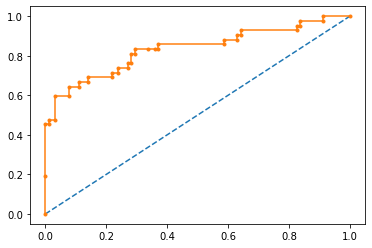

In [141]:
# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_test = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc_test)
AUC_test_RF_tune = auc_test
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Measuring the Performance of a Machine Learning Model

In [142]:
from sklearn.metrics import classification_report
print("Classification Report Train Data")
print(classification_report(y_train, prediction_train))

print("Classification Report Test Data")
print(classification_report(y_test, prediction_test))

Classification Report Train Data
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       208
           1       0.95      0.72      0.82       102

    accuracy                           0.89       310
   macro avg       0.91      0.85      0.87       310
weighted avg       0.90      0.89      0.89       310

Classification Report Test Data
              precision    recall  f1-score   support

           0       0.84      0.92      0.88        92
           1       0.79      0.62      0.69        42

    accuracy                           0.83       134
   macro avg       0.81      0.77      0.79       134
weighted avg       0.82      0.83      0.82       134



          Confusion matrix on the train data


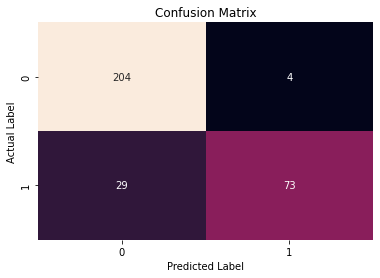

          Confusion matrix on the test data


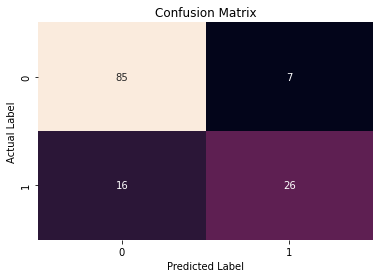

In [143]:
# Get the confusion matrix on the train data
print("          Confusion matrix on the train data")
confusion_matrix(y_train,prediction_train)
sns.heatmap(confusion_matrix(y_train,prediction_train),annot=True, fmt='d',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()
# Get the confusion matrix on the test data
print("          Confusion matrix on the test data")
confusion_matrix(y_test,prediction_test)
sns.heatmap(confusion_matrix(y_test,prediction_test),annot=True, fmt='d',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [144]:
#Public Transport=0, Private Transport=1

In [145]:
c_mat = confusion_matrix(y_train,prediction_train)
TP_RF_tune = c_mat[1,1]   #TP
TN_RF_tune = c_mat[0,0]   #TN
FP_RF_tune = c_mat[1,0]   #FP
FN_RF_tune = c_mat[0,1]   #FN

## - The confusion matrix on Training Data

- True Positives (TP): we correctly predicted that they use Private Transport 73

- True Negatives (TN): we correctly predicted that they use Public Transport 204

- False Positives (FP): we incorrectly predicted that they use Private Transport (a "Type I error") 4 Falsely predict positive Type I error

- False Negatives (FN): we incorrectly predicted that they use Public Transport (a "Type II error") 29 Falsely predict negative Type II error

## - The confusion matrix on Testing Data

- True Positives (TP): we correctly predicted that they use Private Transport 26

- True Negatives (TN): we correctly predicted that they use Public Transport 85

- False Positives (FP): we incorrectly predicted that they use Private Transport (a "Type I error") 7 Falsely predict positive Type I error

- False Negatives (FN): we incorrectly predicted that they use Public Transport (a "Type II error") 16 Falsely predict negative Type II error

# FINAL MODEL COMPARISON

In [153]:
# Import pandas library
import pandas as pd

# initialize list of lists
data = [
        ['Logistic Regression'               ,Acc_Train_LR        ,Acc_Test_LR        ,AUC_train_LR        , AUC_test_LR        ,MAE_LR        ,MSE_LR        ,RMSE_LR        ,TP_LR,        TN_LR        ,FP_LR        ,FN_LR], 
        ['Naive Bayes'                       ,Acc_Train_NB        ,Acc_Test_NB        ,AUC_train_NB        , AUC_test_NB        ,MAE_NB        ,MSE_NB        ,RMSE_NB        ,TP_NB        ,TN_NB        ,FP_NB        ,FN_NB], 
        ['k-Nearest Neighbour'               ,Acc_Train_kNN       ,Acc_Test_kNN       ,AUC_train_kNN       , AUC_test_kNN       ,MAE_kNN       ,MSE_kNN       ,RMSE_kNN       ,TP_kNN       ,TN_kNN       ,FP_kNN       ,FN_kNN, 
        ['Linear Discriminant Analysis'      ,Acc_Train_LDA       ,Acc_Test_LDA       ,AUC_train_LDA       , AUC_test_LDA       ,MAE_LDA       ,MSE_LDA       ,RMSE_LDA       ,TP_LDA       ,TN_LDA       ,FP_LDA       ,FN_LDA],
        ['Classification And Regression Tree',Acc_Train_CART      ,Acc_Test_CART      ,AUC_train_CART      , AUC_test_CART      ,MAE_CART      ,MSE_CART      ,RMSE_CART      ,TP_CART      ,TN_CART      ,FP_CART      ,FN_CART],
        ['Regularised CART'                  ,Acc_Train_CART_reg  ,Acc_Test_CART_reg  ,AUC_train_CART_reg  , AUC_test_CART_reg  ,MAE_CART_reg  ,MSE_CART_reg  ,RMSE_CART_reg  ,TP_CART_reg  ,TN_CART_reg  ,FP_CART_reg  ,FN_CART_reg],
        ['Random Forest'                     ,Acc_Train_RF        ,Acc_Test_RF        ,AUC_train_RF        , AUC_test_RF        ,MAE_RF        ,MSE_RF        ,RMSE_RF        ,TP_RF        ,TN_RF        ,FP_RF,FN_RF] ,
        ['Random Forest_tune'                ,Acc_Train_RF_tune   ,Acc_Test_RF_tune   ,AUC_train_RF_tune   , AUC_test_RF_tune   ,MAE_RF_tune   ,MSE_RF_tune   ,RMSE_RF_tune   ,TP_RF_tune   ,TN_RF_tune   ,FP_RF_tune   ,FN_RF_tune]
       ]
# Create the pandas DataFrame
Model_Performance = pd.DataFrame(data,columns=['Model',"Acc_Train","Acc_Test","AUC_train", "AUC_test",'MAE','MSE','RMSE',"TP",'TN','FP','FN'])

# print dataframe.
Model_Performance


SyntaxError: invalid syntax (Temp/ipykernel_10412/2376240937.py, line 16)

In [159]:
# Import pandas library
import pandas as pd

# initialize list of lists
data = [
        ['Logistic Regression'               ,Acc_Train_LR        ,Acc_Test_LR        ,AUC_train_LR        , AUC_test_LR        ,MAE_LR        ,MSE_LR        ,RMSE_LR        ,TP_LR,        TN_LR        ,FP_LR        ,FN_LR], 
        ['Naive Bayes'                       ,Acc_Train_NB        ,Acc_Test_NB        ,AUC_train_NB        , AUC_test_NB        ,MAE_NB        ,MSE_NB        ,RMSE_NB        ,TP_NB        ,TN_NB        ,FP_NB        ,FN_NB], 
        ['k-Nearest Neighbour'               ,Acc_Train_kNN       ,Acc_Test_kNN       ,AUC_train_kNN       , AUC_test_kNN       ,MAE_kNN       ,MSE_kNN       ,RMSE_kNN       ,TP_kNN       ,TN_kNN       ,FP_kNN       ,FN_kNN], 
        ['Linear Discriminant Analysis'      ,Acc_Train_LDA       ,Acc_Test_LDA       ,AUC_train_LDA       , AUC_test_LDA       ,MAE_LDA       ,MSE_LDA       ,RMSE_LDA       ,TP_LDA       ,TN_LDA       ,FP_LDA       ,FN_LDA],
        ['Classification And Regression Tree',Acc_Train_CART      ,Acc_Test_CART      ,AUC_train_CART      , AUC_test_CART      ,MAE_CART      ,MSE_CART      ,RMSE_CART      ,TP_CART      ,TN_CART      ,FP_CART      ,FN_CART],
        ['Regularised CART'                  ,Acc_Train_CART_reg  ,Acc_Test_CART_reg  ,AUC_train_CART_reg  , AUC_test_CART_reg  ,MAE_CART_reg  ,MSE_CART_reg  ,RMSE_CART_reg  ,TP_CART_reg  ,TN_CART_reg  ,FP_CART_reg  ,FN_CART_reg],
        ['Random Forest'                     ,Acc_Train_RF        ,Acc_Test_RF        ,AUC_train_RF        , AUC_test_RF        ,MAE_RF        ,MSE_RF        ,RMSE_RF        ,TP_RF        ,TN_RF        ,FP_RF,FN_RF] ,
        ['Random Forest_tune'                ,Acc_Train_RF_tune   ,Acc_Test_RF_tune   ,AUC_train_RF_tune   , AUC_test_RF_tune   ,MAE_RF_tune   ,MSE_RF_tune   ,RMSE_RF_tune   ,TP_RF_tune   ,TN_RF_tune   ,FP_RF_tune   ,FN_RF_tune]
       ]
# Create the pandas DataFrame
Model_Performance = pd.DataFrame(data,columns=['Model',"Acc_Train","Acc_Test","AUC_train", "AUC_test",'MAE','MSE','RMSE',"TP",'TN','FP','FN'])

# print dataframe.
Model_Performance.sort_values(by="FP",ascending=True)


,Model,Acc_Train,Acc_Test,AUC_train,AUC_test,MAE,MSE,RMSE,TP,TN,FP,FN
2,k-Nearest Neighbour,1.000000,0.783582,1.000000,0.760093,0.216418,0.216418,0.465207,102,208,0,0
4,Classification And Regression Tree,1.000000,0.805970,1.000000,0.781056,0.194030,0.194030,0.440488,102,208,0,0
6,Random Forest,1.000000,0.828358,1.000000,0.851967,0.171642,0.171642,0.414297,102,208,0,0
5,Regularised CART,0.919355,0.738806,0.966440,0.682971,0.261194,0.261194,0.511071,81,204,21,4
7,Random Forest_tune,0.893548,0.828358,0.965026,0.834110,0.171642,0.171642,0.414297,73,204,29,4
3,Linear Discriminant Analysis,0.800000,0.820896,0.833522,0.809783,0.179104,0.179104,0.423207,57,191,45,17
0,Logistic Regression,0.790323,0.820896,0.832155,0.817805,0.179104,0.179104,0.423207,53,192,49,16
1,Naive Bayes,0.793548,0.791045,0.797511,0.780538,0.208955,0.208955,0.457116,51,195,51,13
